# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [65]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [66]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [67]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [68]:
## get Series by column
# df[column name]
# df.<column name>
## get DataFrame by column
# df[list of column name]
# ex: df[["國文", "英文"]]
## get DataFrame by index
# df[slice]
# df[list of boolean]
# ex: df[0:3]
# ex: df[df.國文 == 15]

df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [36]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

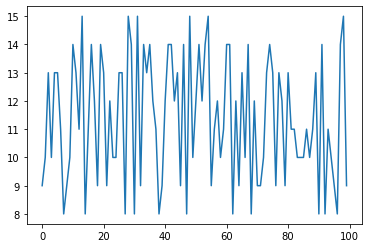

In [37]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

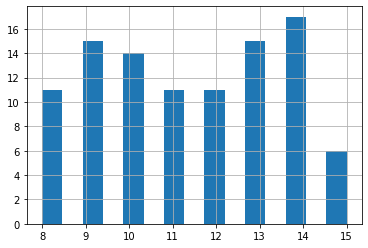

In [38]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [14]:
df.國文.mean()

11.39

算標準差。

In [15]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [17]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [18]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [19]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [69]:
df["總級分"] = df.loc[:, "國文":"社會"].sum(axis = 1)
df.head(5)

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [70]:
df["加權"] = 2*df.國文 + df.英文 + df.數學

In [71]:
df.head(5)

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,43
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,49
3,陳上紫,10,10,8,9,14,51,38
4,崔靜成,13,12,14,12,13,64,52


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [72]:
df.sort_values("總級分", ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,53
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,54
25,蔡亦瑄,13,13,14,13,12,65,53
57,胡淳茜,12,15,14,13,11,65,53
37,曾怡君,11,12,15,13,14,65,49
48,陳怡婷,15,14,12,9,15,65,56
64,俞志峰,9,14,13,14,15,65,45
83,李士賢,10,14,15,13,13,65,49
87,趙偉希,10,13,14,13,15,65,47


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [73]:
df2 = df.sort_values(by = ["加權", "總級分"], ascending = False)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
48,陳怡婷,15,14,12,9,15,65,56
73,吳志遠,13,15,15,8,8,59,56
54,陳怡潔,15,15,9,15,11,65,54
80,施雅鈴,13,15,12,13,13,66,53
25,蔡亦瑄,13,13,14,13,12,65,53


### 【重點】重設 index

In [74]:
df2.index = range(1, 101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,陳怡婷,15,14,12,9,15,65,56
2,吳志遠,13,15,15,8,8,59,56
3,陳怡潔,15,15,9,15,11,65,54
4,施雅鈴,13,15,12,13,13,66,53
5,蔡亦瑄,13,13,14,13,12,65,53


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [75]:
df2[df2.數學 == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
2,吳志遠,13,15,15,8,8,59,56
11,詹威德,12,13,15,10,14,64,52
12,林哲法,14,9,15,10,14,62,52
26,曾怡君,11,12,15,13,14,65,49
27,李士賢,10,14,15,13,13,65,49
44,陳竹伯,10,12,15,10,14,61,47
50,芮秋辛,11,10,15,10,8,54,47
51,葉儀依,9,13,15,8,14,59,46
54,張雅彬,10,11,15,12,8,56,46
58,周育霖,9,12,15,13,12,61,45


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [76]:
df2[(df2.數學 == 15) & (df2.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
2,吳志遠,13,15,15,8,8,59,56


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [82]:
df3 = df2.copy(deep = True)
df3 = df3.drop("總級分", axis = "columns")
df3.head()

,姓名,國文,英文,數學,自然,社會,加權
1,陳怡婷,15,14,12,9,15,56
2,吳志遠,13,15,15,8,8,56
3,陳怡潔,15,15,9,15,11,54
4,施雅鈴,13,15,12,13,13,53
5,蔡亦瑄,13,13,14,13,12,53


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [83]:
df2.drop("總級分", axis = "columns", inplace = True)
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
1,陳怡婷,15,14,12,9,15,56
2,吳志遠,13,15,15,8,8,56
3,陳怡潔,15,15,9,15,11,54
4,施雅鈴,13,15,12,13,13,53
5,蔡亦瑄,13,13,14,13,12,53


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [84]:
df2.drop(5, axis = "index")

,姓名,國文,英文,數學,自然,社會,加權
1,陳怡婷,15,14,12,9,15,56
2,吳志遠,13,15,15,8,8,56
3,陳怡潔,15,15,9,15,11,54
4,施雅鈴,13,15,12,13,13,53
6,胡淳茜,12,15,14,13,11,53
...,...,...,...,...,...,...,...
96,林建亨,9,11,8,8,11,37
97,許立偉,8,10,10,15,9,36
98,林金鳳,8,9,10,10,8,35
99,梁慧君,9,8,8,8,12,34


In [92]:
df2[df2.姓名 == "吳志遠"]

,姓名,國文,英文,數學,自然,社會,加權
2,吳志遠,13,15,15,8,8,56


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [54]:
df2.drop(df2[df2.姓名 == "吳志遠"].index, axis = "index")

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [94]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [95]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-17,37.724998,37.142502,37.205002,37.389999,95174000.0,35.395840
2017-07-18,37.532501,37.167500,37.299999,37.520000,71475200.0,35.518909
2017-07-19,37.855000,37.487499,37.619999,37.755001,83692000.0,35.741390
2017-07-20,37.935001,37.547501,37.875000,37.584999,68974800.0,35.580444
2017-07-21,37.610001,37.220001,37.497501,37.567501,105010400.0,35.563877


#### 只要最後 300 個交易日!

In [98]:
df = df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-06,129.750000,127.129997,127.889999,129.740005,78128300.0,128.784241
2021-05-07,131.259995,129.479996,130.850006,130.210007,78973300.0,129.470322
2021-05-10,129.539993,126.809998,129.410004,126.849998,88071200.0,126.129395
2021-05-11,126.269997,122.769997,123.500000,125.910004,126142800.0,125.194740
2021-05-12,124.639999,122.250000,123.400002,122.769997,112172300.0,122.072563
...,...,...,...,...,...,...
2022-07-08,147.550003,145.000000,145.259995,147.039993,64493200.0,147.039993
2022-07-11,146.639999,143.779999,145.669998,144.869995,63141600.0,144.869995
2022-07-12,148.449997,145.050003,145.759995,145.860001,77588800.0,145.860001


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

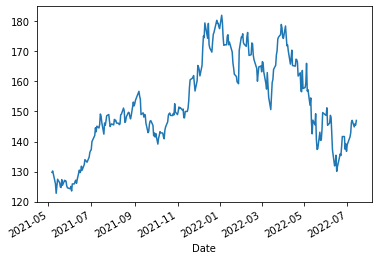

In [99]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

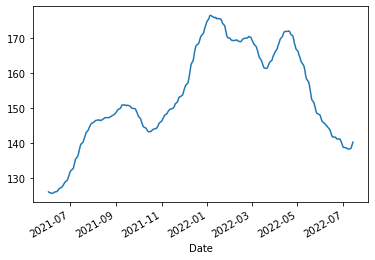

In [101]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

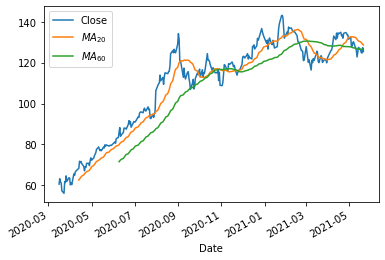

In [68]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [102]:
close = df.Close.values
len(close)

300

In [103]:
x = close[:-1]
len(x)

299

In [104]:
y = close[1:]
len(x)

299

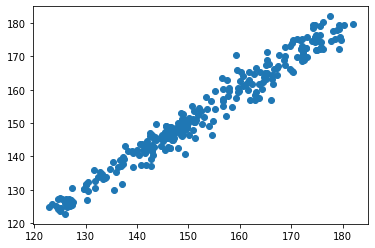

In [106]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [107]:
random_data = np.random.randn(4,3)

In [108]:
random_data

array([[-0.23813342,  0.70206807,  0.05575712],
       [ 0.58846973, -0.04388624,  0.58829529],
       [-0.65478926, -0.5028452 ,  1.21381809],
       [ 1.17247376, -1.09320568, -0.10740081]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [110]:
df4 = pd.DataFrame(random_data, columns=list("ABC"))

In [87]:
df4

,A,B,C
0,-2.552313,1.906824,-0.201567
1,1.017096,-0.032225,-0.379340
2,-0.251371,1.026546,2.267663
3,-0.068840,-0.611686,0.174140


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [112]:
df5 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [113]:
df5

,A,B,C
0,-0.355535,-2.112454,1.006309
1,0.346695,-1.773655,-0.682772
2,1.166428,-0.455264,0.316843


In [114]:
df6 = pd.concat([df4, df5], axis = "index")

In [115]:
df6

,A,B,C
0,-0.238133,0.702068,0.055757
1,0.588470,-0.043886,0.588295
2,-0.654789,-0.502845,1.213818
3,1.172474,-1.093206,-0.107401
0,-0.355535,-2.112454,1.006309
1,0.346695,-1.773655,-0.682772
2,1.166428,-0.455264,0.316843


前面我們弄得亂七八糟的 index 重設一下。

In [116]:
df6.index = range(len(df6.index))

In [117]:
df6

,A,B,C
0,-0.238133,0.702068,0.055757
1,0.588470,-0.043886,0.588295
2,-0.654789,-0.502845,1.213818
3,1.172474,-1.093206,-0.107401
4,-0.355535,-2.112454,1.006309
5,0.346695,-1.773655,-0.682772
6,1.166428,-0.455264,0.316843


#### 横向的貼

In [119]:
df7 = pd.concat([df4, df5], axis = "columns")

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [120]:
df7 

,A,B,C,A,B,C
0,-0.238133,0.702068,0.055757,-0.355535,-2.112454,1.006309
1,0.588470,-0.043886,0.588295,0.346695,-1.773655,-0.682772
2,-0.654789,-0.502845,1.213818,1.166428,-0.455264,0.316843
3,1.172474,-1.093206,-0.107401,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [129]:
df_names = pd.read_csv("data/names.csv", names = ["姓名"])

In [130]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [141]:
random_df_grades = pd.DataFrame(np.random.randint(6,16,(len(df_names.index),5)),
                        columns=['國文','英文','數學','社會','自然'])

In [135]:
random_df_grades

,國文,英文,數學,社會,自然
0,6,10,7,15,10
1,13,15,6,14,9
2,8,8,9,14,10
3,13,10,13,6,13
4,15,12,11,15,6
...,...,...,...,...,...
95,9,7,15,11,7
96,9,14,13,14,6
97,8,6,10,12,13
98,13,8,10,11,12


In [142]:
random_df_grades.to_csv("data/grades2.csv", index = False)
df_grades = pd.read_csv("data/grades2.csv", header = 0)
df_score = pd.concat([df_names, df_grades], axis = "columns")
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,10,15,10,9,15
1,王紹尹,14,8,13,13,8
2,黃季坤,9,11,7,14,15
3,許正書,11,7,9,6,6
4,張鈞蓮,15,10,7,8,10
...,...,...,...,...,...,...
95,陳君生,15,6,11,14,14
96,曾桂甫,10,7,11,10,7
97,林欣怡,9,7,10,12,6
98,林佳霖,10,8,10,10,7


,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,12,6,6,8,12
1,王紹尹,1,10,6,13,13,6
2,黃季坤,2,11,14,13,13,11
3,許正書,3,10,13,13,14,12
4,張鈞蓮,4,8,13,14,9,13
...,...,...,...,...,...,...,...
95,陳君生,95,11,9,13,14,10
96,曾桂甫,96,14,9,12,11,9
97,林欣怡,97,15,8,13,14,14
98,林佳霖,98,8,11,9,7,10
